# importing libraries

In [303]:
%%time
import os
import pandas as pd
from os import listdir
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

Wall time: 0 ns


# extracting files and converting into dataframe

In [ ]:
%%time
folder_dir="txt_reviews"
list=[]
for j in os.listdir(folder_dir):
    f = open("txt_reviews/"+j,'r',encoding = 'utf-8')
    for line in f:
        a=line.splitlines()
        list.append(a)
new_list=[]
for i in list:
    b=i[0].split()
    new_list.append(b)

result = [i[1:] for i in new_list]
new_result=[' '.join(x) for x in result]
new_result
x = [new_result[i:i + 9] for i in range(0, len(new_result), 9)]
new_df = pd.DataFrame(x, columns=['ProductId','UserId','ProfileName','HelpfulnessNumerator','HelpfulnessDenominator','Score','Time','ReviewSummary','ReviewText'])
new_df

# creating dataframe to CSV

In [344]:
df=pd.read_csv('text_data.csv')

# head()


In [345]:
df.head()

,Unnamed: 0,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText
0,0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,1,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...
2,2,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,1,1331164800,Bad,I fed this to my Golden Retriever and he hated...
3,3,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,2,1332374400,"Not hot, not habanero","I have to admit, I was a sucker for the large ..."
4,4,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,4,1337472000,The best weve tried so far,We have a 7 week old... He had gas and constip...


# columns

In [346]:
df.columns

Index(['Unnamed: 0', 'ProductId', 'UserId', 'ProfileName',
       'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time',
       'ReviewSummary', 'ReviewText'],
      dtype='object')

# missing values check

In [347]:
for i in df.columns:
    print("Missing Values in ",i," is -", df[i].isna().sum())


Missing Values in  Unnamed: 0  is - 0
Missing Values in  ProductId  is - 0
Missing Values in  UserId  is - 0
Missing Values in  ProfileName  is - 16
Missing Values in  HelpfulnessNumerator  is - 0
Missing Values in  HelpfulnessDenominator  is - 0
Missing Values in  Score  is - 0
Missing Values in  Time  is - 0
Missing Values in  ReviewSummary  is - 27
Missing Values in  ReviewText  is - 0


# info


In [348]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568453 entries, 0 to 568452
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Unnamed: 0              568453 non-null  int64 
 1   ProductId               568453 non-null  object
 2   UserId                  568453 non-null  object
 3   ProfileName             568437 non-null  object
 4   HelpfulnessNumerator    568453 non-null  int64 
 5   HelpfulnessDenominator  568453 non-null  int64 
 6   Score                   568453 non-null  int64 
 7   Time                    568453 non-null  int64 
 8   ReviewSummary           568426 non-null  object
 9   ReviewText              568453 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


# checking duplicates

In [349]:
df.duplicated().sum()

0

In [350]:
df[df.ReviewSummary.isnull()]

,Unnamed: 0,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText
1234,1234,B0014B0HWK,A3TJPSWY2HE4BS,"S. Layton ""homeschool blogger""",1,24,2,1173312000,NaN,I only used two maybe three tea bags and got p...
3314,3314,B000FVDWU4,A3TJPSWY2HE4BS,"S. Layton ""homeschool blogger""",1,24,2,1173312000,NaN,I only used two maybe three tea bags and got p...
19465,19465,B0016B7Z32,A3TJPSWY2HE4BS,"S. Layton ""homeschool blogger""",1,24,2,1173312000,NaN,I only used two maybe three tea bags and got p...
61906,61906,B0009VO58S,A3TJPSWY2HE4BS,"S. Layton ""homeschool blogger""",1,24,2,1173312000,NaN,I only used two maybe three tea bags and got p...
86992,86992,B00073IVAQ,A3TJPSWY2HE4BS,"S. Layton ""homeschool blogger""",1,24,2,1173312000,NaN,I only used two maybe three tea bags and got p...
109418,109418,B000FVBYCW,A3TJPSWY2HE4BS,"S. Layton ""homeschool blogger""",1,24,2,1173312000,NaN,I only used two maybe three tea bags and got p...
125216,125216,B00020HHAO,A3TJPSWY2HE4BS,"S. Layton ""homeschool blogger""",1,24,2,1173312000,NaN,I only used two maybe three tea bags and got p...
152852,152853,B000ELGPAO,A15AMT9T9A1309,Film-Friend,1,1,3,1328572800,NaN,This is a cool system only problem is that the...
215453,215454,B00020HHM2,A3TJPSWY2HE4BS,"S. Layton ""homeschool blogger""",1,24,2,1173312000,NaN,I only used two maybe three tea bags and got p...
221662,221663,B00142BX68,A3TJPSWY2HE4BS,"S. Layton ""homeschool blogger""",1,24,2,1173312000,NaN,I only used two maybe three tea bags and got p...


In [351]:
df=df.dropna()

In [352]:
for i in df.columns:
    print("Missing Values in ",i," is -", df[i].isna().sum())

Missing Values in  Unnamed: 0  is - 0
Missing Values in  ProductId  is - 0
Missing Values in  UserId  is - 0
Missing Values in  ProfileName  is - 0
Missing Values in  HelpfulnessNumerator  is - 0
Missing Values in  HelpfulnessDenominator  is - 0
Missing Values in  Score  is - 0
Missing Values in  Time  is - 0
Missing Values in  ReviewSummary  is - 0
Missing Values in  ReviewText  is - 0


# removing first column

In [353]:
df = df.drop('Unnamed: 0', axis=1)

In [354]:
df.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...
2,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,1,1331164800,Bad,I fed this to my Golden Retriever and he hated...
3,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,2,1332374400,"Not hot, not habanero","I have to admit, I was a sucker for the large ..."
4,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,4,1337472000,The best weve tried so far,We have a 7 week old... He had gas and constip...


In [355]:
df.drop(['ProductId', 'UserId','ProfileName','Time'], axis=1)

,HelpfulnessNumerator,HelpfulnessDenominator,Score,ReviewSummary,ReviewText
0,1,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,0,0,5,Healthy Dog Food,This is a very healthy dog food. Good for thei...
2,0,1,1,Bad,I fed this to my Golden Retriever and he hated...
3,2,5,2,"Not hot, not habanero","I have to admit, I was a sucker for the large ..."
4,0,1,4,The best weve tried so far,We have a 7 week old... He had gas and constip...
...,...,...,...,...,...
568448,2,5,5,Good Stuff,I love these noodle. A little to spicy for the...
568449,2,5,5,yummy!,I just love it and will buy another box when I...
568450,2,5,4,Tastes like More!,My late father in law used to have a rating sy...
568451,2,5,5,Great ramen,This is my favorite brand of Korean ramen. It ...


# reordering columns

In [356]:
df=df[['ReviewSummary','ReviewText','HelpfulnessNumerator','HelpfulnessDenominator','Score']]

In [357]:
df.head()

,ReviewSummary,ReviewText,HelpfulnessNumerator,HelpfulnessDenominator,Score
0,Good Quality Dog Food,I have bought several of the Vitality canned d...,1,1,5
1,Healthy Dog Food,This is a very healthy dog food. Good for thei...,0,0,5
2,Bad,I fed this to my Golden Retriever and he hated...,0,1,1
3,"Not hot, not habanero","I have to admit, I was a sucker for the large ...",2,5,2
4,The best weve tried so far,We have a 7 week old... He had gas and constip...,0,1,4


ReviewSummary                                             My son loved them
ReviewText                My son loved them. I will be buying him some m...
HelpfulnessNumerator                                                      3
HelpfulnessDenominator                                                    3
Score                                                                     5
sentiment                                                          positive
Name: 26337, dtype: object

  # Adding sentiment column

In [34]:
# creating a funtion if score <=3 returns negative else positive

In [359]:
def mark_sentiment(Score):
    if(Score<=3):
        return "negative"
    else:
        return "positive"

In [360]:
df['sentiment'] = df['Score'].apply(mark_sentiment)

In [361]:
df.head()

,ReviewSummary,ReviewText,HelpfulnessNumerator,HelpfulnessDenominator,Score,sentiment
0,Good Quality Dog Food,I have bought several of the Vitality canned d...,1,1,5,positive
1,Healthy Dog Food,This is a very healthy dog food. Good for thei...,0,0,5,positive
2,Bad,I fed this to my Golden Retriever and he hated...,0,1,1,negative
3,"Not hot, not habanero","I have to admit, I was a sucker for the large ...",2,5,2,negative
4,The best weve tried so far,We have a 7 week old... He had gas and constip...,0,1,4,positive


In [363]:
df.reset_index(drop=True, inplace=True)

In [364]:
df.head()

,ReviewSummary,ReviewText,HelpfulnessNumerator,HelpfulnessDenominator,Score,sentiment
0,Good Quality Dog Food,I have bought several of the Vitality canned d...,1,1,5,positive
1,Healthy Dog Food,This is a very healthy dog food. Good for thei...,0,0,5,positive
2,Bad,I fed this to my Golden Retriever and he hated...,0,1,1,negative
3,"Not hot, not habanero","I have to admit, I was a sucker for the large ...",2,5,2,negative
4,The best weve tried so far,We have a 7 week old... He had gas and constip...,0,1,4,positive


In [365]:
y = df['sentiment']
X = df[['ReviewText']]

In [366]:
X.head()

,ReviewText
0,I have bought several of the Vitality canned d...
1,This is a very healthy dog food. Good for thei...
2,I fed this to my Golden Retriever and he hated...
3,"I have to admit, I was a sucker for the large ..."
4,We have a 7 week old... He had gas and constip...


In [367]:
y.head()

0    positive
1    positive
2    negative
3    negative
4    positive
Name: sentiment, dtype: object

In [368]:
X.loc[148823]


ReviewText    i am a diehard fan of shake n'bake. my kids ad...
Name: 148823, dtype: object

In [369]:
y.loc[148823]

'positive'

# splitting into train and test data set

In [383]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [384]:
X_train.shape

(397887, 1)

In [385]:
X_test.shape

(170523, 1)

# Data preprocessing

In [373]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

#### Initiating lemmatizer()

In [386]:

lemmatizer = WordNetLemmatizer()

In [387]:
def preprocess(raw_text, flag):
    # Removing special characters and digits
    sentence = re.sub("[^a-zA-Z]", " ", raw_text)
    
    # change sentence to lower case
    sentence = sentence.lower()

    # tokenize into words
    tokens = sentence.split()
    
    # remove stop words                
    clean_tokens = [t for t in tokens if not t in stopwords.words("english")]
    
    # Stemming/Lemmatization
    if(flag == 'stem'):
        clean_tokens = [stemmer.stem(word) for word in clean_tokens]
    else:
        clean_tokens = [lemmatizer.lemmatize(word) for word in clean_tokens]
    
    return pd.Series([" ".join(clean_tokens), len(clean_tokens)])

In [53]:
!pip install tqdm

In [388]:
from tqdm import tqdm, tqdm_notebook

In [389]:
tqdm.pandas()

In [60]:
!pip install --user -U nltk

In [34]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\racha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\racha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\racha\AppData\Roaming\nltk_data...


True

In [378]:
temp_df1 = X_train['ReviewText'].progress_apply(lambda x: preprocess(x, 'lemma'))

  

100%|██████████| 397887/397887 [2:12:26<00:00, 50.07it/s]   


In [379]:
temp_df1.to_csv("updated_lemma.csv")

In [390]:
temp_df1.columns = ['clean_text_lemma', 'text_length_lemma']

temp_df1.head()

,clean_text_lemma,text_length_lemma
455620,part dr oz tea diet work like charm lost inch ...,12
235606,regular flavor br give zero start bad br hard ...,32
335525,third fourth time hit amazon grocery sale get ...,13
352999,believe gerber may mixed apricot peach sour ta...,10
178883,wasabi flavor really nice love taking brown ri...,40


In [391]:
X_train = pd.concat([X_train, temp_df1], axis=1)

X_train.head()

,ReviewText,clean_text_lemma,text_length_lemma
455620,This is part of Dr. Oz's Tea Diet. Works like ...,part dr oz tea diet work like charm lost inch ...,12
235606,This is for the regular flavor...<br />I give ...,regular flavor br give zero start bad br hard ...,32
335525,This is the third or fourth time we've hit up ...,third fourth time hit amazon grocery sale get ...,13
352999,I believe gerber may have mixed apricots with ...,believe gerber may mixed apricot peach sour ta...,10
178883,The Wasabi flavor on these is really nice. I l...,wasabi flavor really nice love taking brown ri...,40


## creating word cloud

In [38]:
!pip install wordcloud

In [392]:
from wordcloud import WordCloud

In [393]:
positive_df = X_train.loc[y_train=='positive', :]

positive_df.head()

,ReviewText,clean_text_lemma,text_length_lemma
335525,This is the third or fourth time we've hit up ...,third fourth time hit amazon grocery sale get ...,13
178883,The Wasabi flavor on these is really nice. I l...,wasabi flavor really nice love taking brown ri...,40
369497,My wife likes it and it was a good value. Work...,wife like good value work well senseo use one ...,23
536401,"I purchased these on a whim, and after researc...",purchased whim researching disposable product ...,116
182171,I really like the taste of this dressing. Goes...,really like taste dressing go great meal salad,8


In [394]:
words = ' '.join(positive_df['clean_text_lemma'])

print(words[:100])

third fourth time hit amazon grocery sale get cheap many broken price good wasabi flavor really nice


In [395]:

cleaned_word = " ".join([word for word in words.split() 
                        if 'subject' not in word])

In [396]:
spam_wordcloud = WordCloud(stopwords=stopwords.words("english"),
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(cleaned_word)

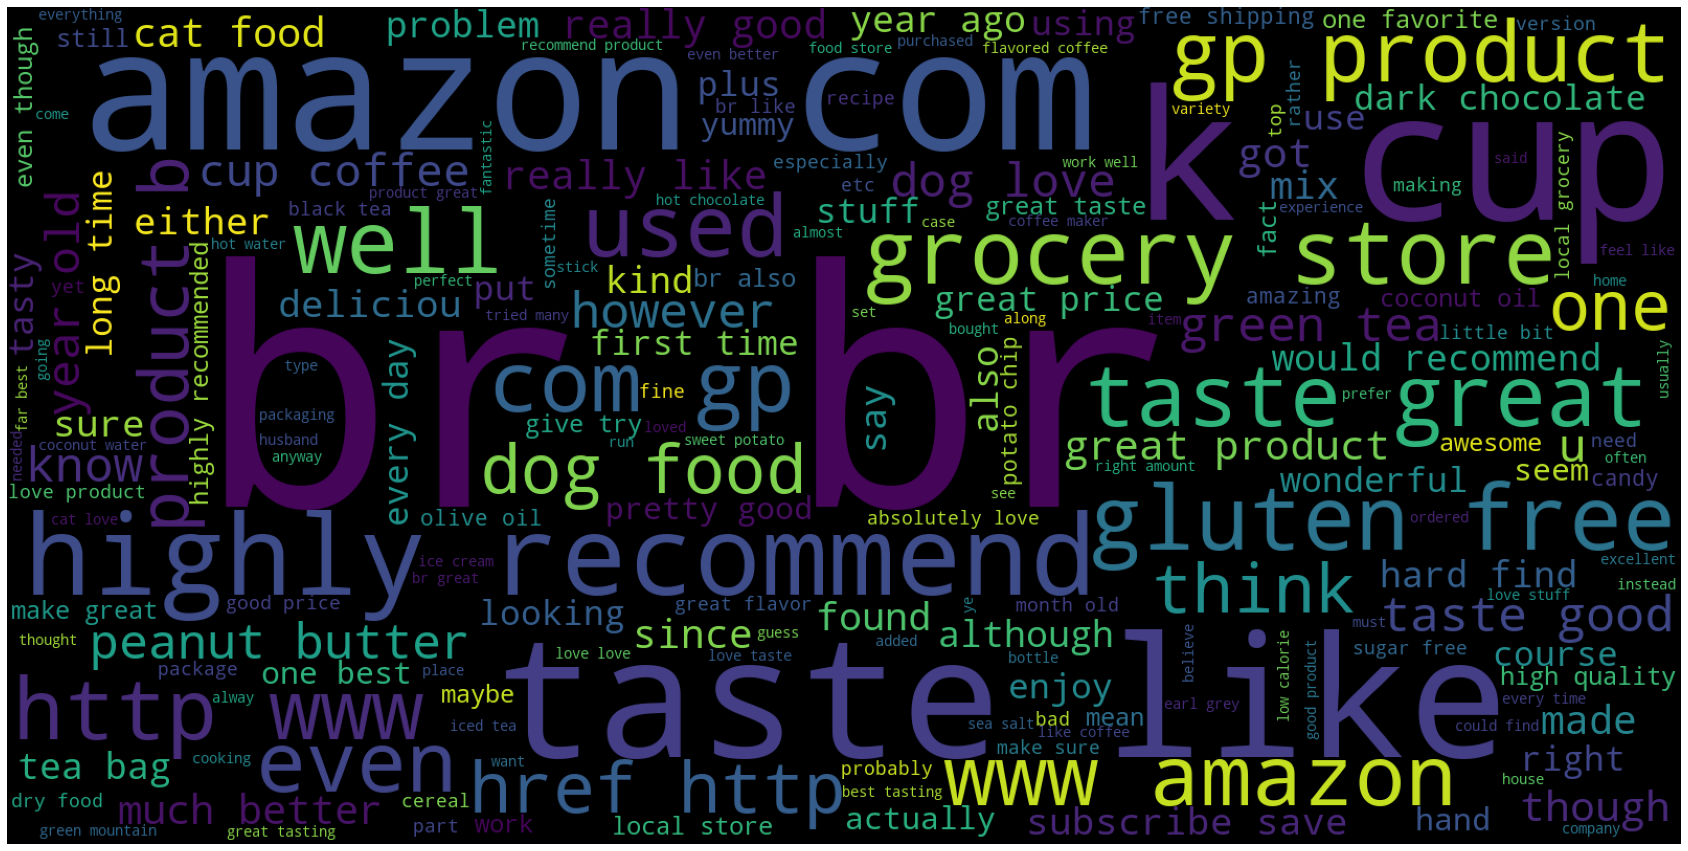

In [397]:
plt.figure(1,figsize=(30,20))
plt.imshow(spam_wordcloud)
plt.axis('off')
plt.show()

In [398]:
negative_df = X_train.loc[y_train=='negative', :]

words = ' '.join(negative_df['clean_text_lemma'])

cleaned_word = " ".join([word for word in words.split() 
                        ])

In [399]:
ham_wordcloud = WordCloud(stopwords=stopwords.words("english"),
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(cleaned_word)

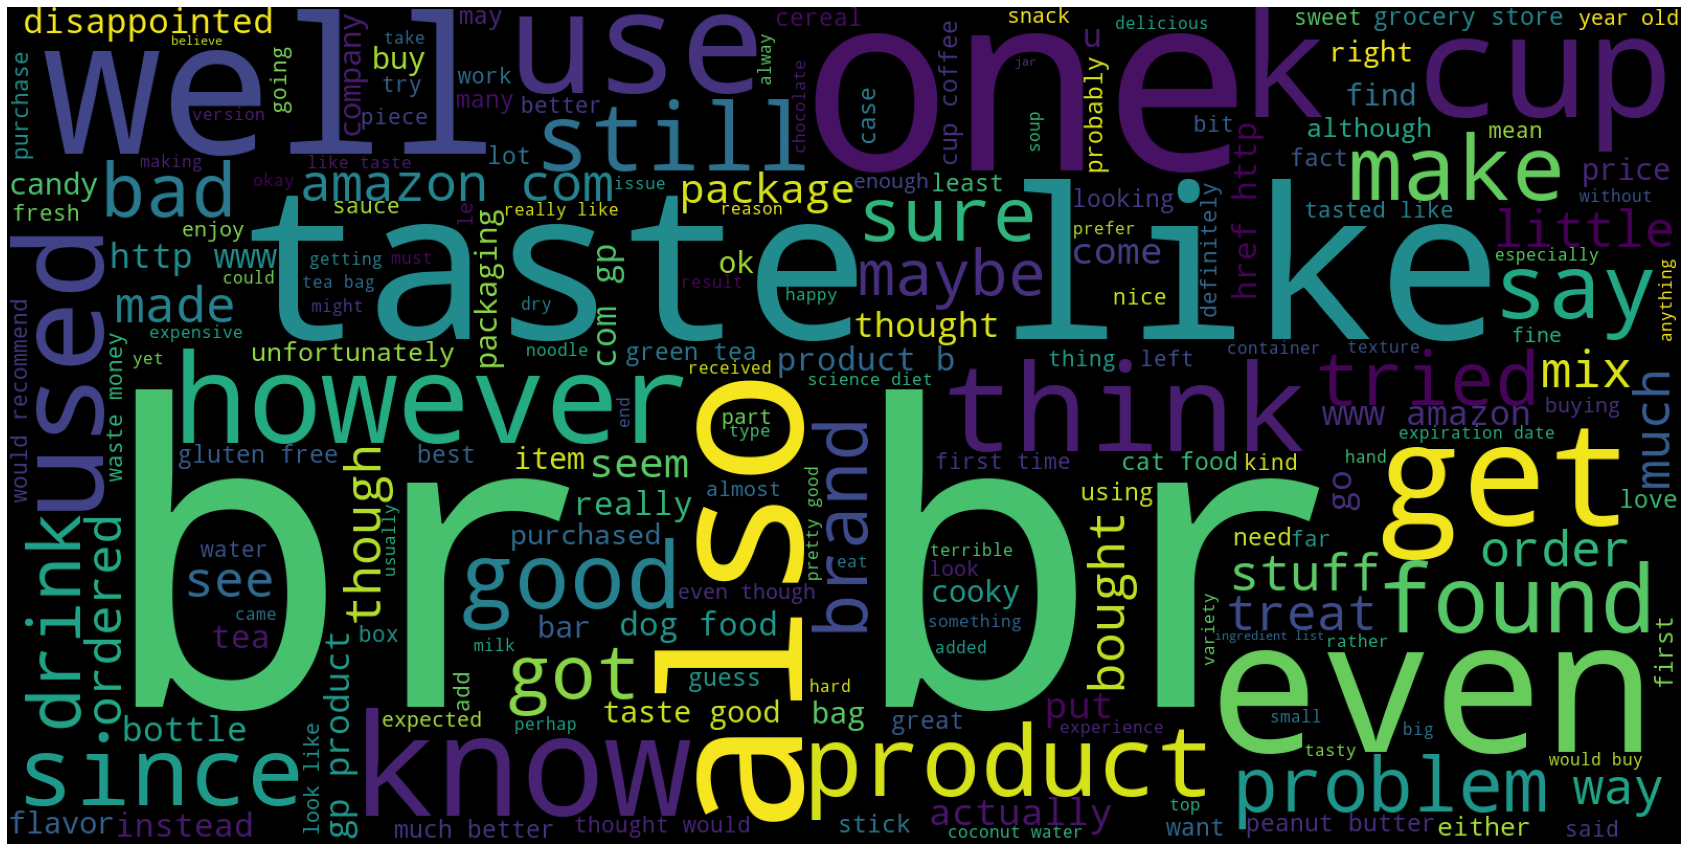

In [400]:
plt.figure(1,figsize=(30,20))
plt.imshow(ham_wordcloud)
plt.axis('off')
plt.show()

# word2vec

In [80]:
!pip install gensim

  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.24
    Uninstalling Cython-0.29.24:
      Successfully uninstalled Cython-0.29.24


In [401]:
import gensim

print(gensim.__version__)

4.2.0


In [402]:
from gensim.models import Word2Vec

In [403]:
X_train['tokenised_sentences'] = X_train.clean_text_lemma.apply(lambda sent : sent.split())

X_train.head()

,ReviewText,clean_text_lemma,text_length_lemma,tokenised_sentences
455620,This is part of Dr. Oz's Tea Diet. Works like ...,part dr oz tea diet work like charm lost inch ...,12,"[part, dr, oz, tea, diet, work, like, charm, l..."
235606,This is for the regular flavor...<br />I give ...,regular flavor br give zero start bad br hard ...,32,"[regular, flavor, br, give, zero, start, bad, ..."
335525,This is the third or fourth time we've hit up ...,third fourth time hit amazon grocery sale get ...,13,"[third, fourth, time, hit, amazon, grocery, sa..."
352999,I believe gerber may have mixed apricots with ...,believe gerber may mixed apricot peach sour ta...,10,"[believe, gerber, may, mixed, apricot, peach, ..."
178883,The Wasabi flavor on these is really nice. I l...,wasabi flavor really nice love taking brown ri...,40,"[wasabi, flavor, really, nice, love, taking, b..."


In [405]:
X_train.shape

(397887, 4)

# train model

In [406]:

model = Word2Vec(list(X_train.tokenised_sentences), vector_size=300, min_count=1)



In [407]:
print(model)

Word2Vec<vocab=88035, vector_size=300, alpha=0.025>


In [408]:
# Checking the shape of vectors learned by the model

print(model.wv.__getitem__(model.wv.index_to_key).shape)

(88035, 300)


In [409]:
def document_vector(doc, keyed_vectors):
    """Remove out-of-vocabulary words. Create document vectors by averaging word vectors."""
    vocab_tokens = [word for word in doc if word in keyed_vectors.index_to_key]
    return np.mean(keyed_vectors.__getitem__(vocab_tokens), axis=0)

In [410]:
X_train['doc_vector'] = X_train.tokenised_sentences.progress_apply(lambda x : document_vector(x, model.wv))

100%|██████████| 397887/397887 [17:06<00:00, 387.61it/s]


In [411]:
X_train.head()

,ReviewText,clean_text_lemma,text_length_lemma,tokenised_sentences,doc_vector
455620,This is part of Dr. Oz's Tea Diet. Works like ...,part dr oz tea diet work like charm lost inch ...,12,"[part, dr, oz, tea, diet, work, like, charm, l...","[0.20337677, 0.008770838, 0.35430098, 0.850439..."
235606,This is for the regular flavor...<br />I give ...,regular flavor br give zero start bad br hard ...,32,"[regular, flavor, br, give, zero, start, bad, ...","[0.21979152, 0.29293358, 0.049023505, 0.259501..."
335525,This is the third or fourth time we've hit up ...,third fourth time hit amazon grocery sale get ...,13,"[third, fourth, time, hit, amazon, grocery, sa...","[0.14317478, -0.11415201, -0.07549352, -0.0595..."
352999,I believe gerber may have mixed apricots with ...,believe gerber may mixed apricot peach sour ta...,10,"[believe, gerber, may, mixed, apricot, peach, ...","[-0.07102877, -0.004439831, 0.23939833, 0.3817..."
178883,The Wasabi flavor on these is really nice. I l...,wasabi flavor really nice love taking brown ri...,40,"[wasabi, flavor, really, nice, love, taking, b...","[0.040462587, -0.0544374, 0.08069281, -0.16016..."


In [412]:
X_train_w2v = list(X_train.doc_vector)

# preprocessing test data

In [413]:
X_test.head()

,ReviewText
451131,"Would have loved to give five stars, but this ..."
463935,I love K-Cups coffee. They are easy and one al...
523243,This is one of the very best rice pudding mixe...
385241,"Great product, well-liked by everyone who has ..."
207744,"These are dry but not hard, slightly crumbly, ..."


In [414]:
temp_df_t = X_test['ReviewText'].progress_apply(lambda x: preprocess(x, 'lemma'))



100%|██████████| 170523/170523 [55:52<00:00, 50.87it/s]   


In [415]:
temp_df_t.head()

,0,1
451131,would loved give five star shipment scheduled ...,40
463935,love k cup coffee easy one always fresh cup co...,72
523243,one best rice pudding mix ever used since grow...,38
385241,great product well liked everyone tried whilst...,21
207744,dry hard slightly crumbly small cookie sized t...,23


In [416]:
temp_df_t.columns = ['clean_text_lemma', 'text_length_lemma']

temp_df_t.tail()

,clean_text_lemma,text_length_lemma
133604,love love love almond coconut kind bar one mid...,16
417941,use product training dog cut slice small bite ...,45
59544,taste great taste gluten free crunchy keep fre...,22
78804,ordered product last month removing outer box ...,161
393754,spicy little wasabi taste named msg pea hate s...,29


In [417]:
X_test = pd.concat([X_test, temp_df_t], axis=1)

X_test.head()

,ReviewText,clean_text_lemma,text_length_lemma
451131,"Would have loved to give five stars, but this ...",would loved give five star shipment scheduled ...,40
463935,I love K-Cups coffee. They are easy and one al...,love k cup coffee easy one always fresh cup co...,72
523243,This is one of the very best rice pudding mixe...,one best rice pudding mix ever used since grow...,38
385241,"Great product, well-liked by everyone who has ...",great product well liked everyone tried whilst...,21
207744,"These are dry but not hard, slightly crumbly, ...",dry hard slightly crumbly small cookie sized t...,23


In [418]:
X_test['tokenised_sentences'] = X_test.clean_text_lemma.apply(lambda sent : sent.split())

In [419]:
X_test.tail()

,ReviewText,clean_text_lemma,text_length_lemma,tokenised_sentences
133604,"I love, love, love the Almond & Coconut Kind b...",love love love almond coconut kind bar one mid...,16,"[love, love, love, almond, coconut, kind, bar,..."
417941,I use this product for training my dogs. I cut...,use product training dog cut slice small bite ...,45,"[use, product, training, dog, cut, slice, smal..."
59544,"They taste great, they don't taste gluten-free...",taste great taste gluten free crunchy keep fre...,22,"[taste, great, taste, gluten, free, crunchy, k..."
78804,"I ordered this product last month and, after r...",ordered product last month removing outer box ...,161,"[ordered, product, last, month, removing, oute..."
393754,"These are not at all spicy, so little wasabi t...",spicy little wasabi taste named msg pea hate s...,29,"[spicy, little, wasabi, taste, named, msg, pea..."


In [420]:
X_test['doc_vector'] = X_test.tokenised_sentences.progress_apply(lambda x : document_vector(x, model.wv))

100%|██████████| 170523/170523 [09:01<00:00, 314.67it/s]


In [421]:
X_test.head()

,ReviewText,clean_text_lemma,text_length_lemma,tokenised_sentences,doc_vector
451131,"Would have loved to give five stars, but this ...",would loved give five star shipment scheduled ...,40,"[would, loved, give, five, star, shipment, sch...","[0.25722396, 0.033877153, 0.15729776, 0.157926..."
463935,I love K-Cups coffee. They are easy and one al...,love k cup coffee easy one always fresh cup co...,72,"[love, k, cup, coffee, easy, one, always, fres...","[0.057674244, -0.056620196, 0.36052674, 0.2173..."
523243,This is one of the very best rice pudding mixe...,one best rice pudding mix ever used since grow...,38,"[one, best, rice, pudding, mix, ever, used, si...","[0.29838264, -0.48952052, -0.33047113, 0.13237..."
385241,"Great product, well-liked by everyone who has ...",great product well liked everyone tried whilst...,21,"[great, product, well, liked, everyone, tried,...","[-0.018352536, 0.13661078, 0.17113449, -0.1246..."
207744,"These are dry but not hard, slightly crumbly, ...",dry hard slightly crumbly small cookie sized t...,23,"[dry, hard, slightly, crumbly, small, cookie, ...","[-0.30777603, 0.2695124, -0.068756096, 0.40589..."


In [422]:
X_test_w2v = list(X_test.doc_vector)

# applying ML algorithms

# Logistic regresion

In [423]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_w2v, y_train)

C:\Users\racha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [424]:
y_test_pred = classifier.predict(X_test_w2v)

In [425]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

0.8732663628953279
              precision    recall  f1-score   support

    negative       0.77      0.59      0.67     37131
    positive       0.89      0.95      0.92    133392

    accuracy                           0.87    170523
   macro avg       0.83      0.77      0.80    170523
weighted avg       0.87      0.87      0.87    170523



# Decision tree

In [426]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_w2v, y_train)

DecisionTreeClassifier()

In [427]:
y_test_pred_d = classifier.predict(X_test_w2v)

In [428]:
%%time
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, y_test_pred_d))

print(classification_report(y_test, y_test_pred_d))

0.8509702503474604
              precision    recall  f1-score   support

    negative       0.65      0.68      0.66     37131
    positive       0.91      0.90      0.90    133392

    accuracy                           0.85    170523
   macro avg       0.78      0.79      0.78    170523
weighted avg       0.85      0.85      0.85    170523

Wall time: 11.5 s


 # random forest

In [429]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_w2v, y_train)

RandomForestClassifier()

In [431]:
y_test_pred_r = classifier.predict(X_test_w2v)

In [432]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, y_test_pred_r))

print(classification_report(y_test, y_test_pred_r))

0.9050978460383643
              precision    recall  f1-score   support

    negative       0.91      0.63      0.74     37131
    positive       0.90      0.98      0.94    133392

    accuracy                           0.91    170523
   macro avg       0.91      0.80      0.84    170523
weighted avg       0.91      0.91      0.90    170523



In [439]:
y_test_pred_knn = classifier.predict(X_test_w2v)